## Simulation and Modeling Techniques: HW2
### Jered Ataky

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*

### 1. Sweeping parameters

### sweep_p1 function

Prior proceeding with this function, we are going to redefine all the functions
we used previously with bikeshare and which parameters will be used here

In [2]:
# Define functions to move the bike
def bike_to_wellesley(state):
    
    if state.olin == 0:
        state.olin_empty +=1
        return
    
    state.olin -=1
    state.wellesley +=1
    

def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty +=1
        return
    
    state.olin +=1
    state.wellesley -=1
    

# Step function

def step(state, p1, p2):
    
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)



#### Define run_simulation function

In [3]:
def run_simulation(p1, p2, num_steps):
    
    # Create the state object
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)
    
    for i in range(num_steps):
        step(state, p1, p2)
    
    return state

#### Define the sweep function

In [4]:
def sweep_p1(p1_array):
    
    sweep = SweepSeries()
    
    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p1] = state.olin_empty

    plot(sweep, label = 'Olin', color='red')

    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)',
         ylabel='Number of unhappy customers')

#### Test the results

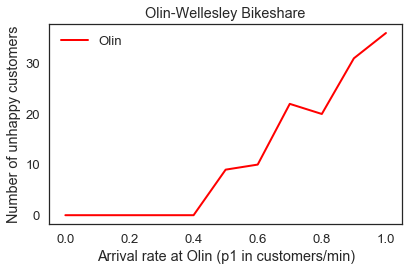

In [5]:
state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)
# Fix value of p2 and num_steps
p2 = 0.2
num_steps = 60

# Define p1_array and set the seed

np.random.seed(1412)
p1_array = linspace(0,1,11)

# Call the function

sweep_p1(p1_array)

### sweep_p2 function

#### Define the sweep function

We are going simply to modify sweep_p1 function to get sweep_p2

In [6]:
def sweep_p2(p2_array):
    
    sweep = SweepSeries()
    
    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty

    plot(sweep, label = 'Olin')

    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p2 in customers/min)',
         ylabel='Number of unhappy customers')

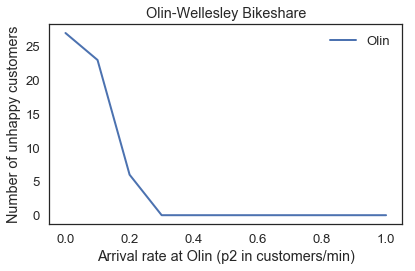

In [7]:
state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)
# Fix value of p1 and num_steps
p1 = 0.5
num_steps = 60

# Define p1_array and set the seed

np.random.seed(1412)
p2_array = linspace(0,1,11)

# Call the function

sweep_p2(p2_array)

### Optional Exercises

#### Redefine the run_simulation function

In [8]:
def run_simulation(p1, p2, num_steps):
    
    # Create the state object
    state = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)
    
    for i in range(num_steps):
        step(state, p1, p2)
    
    return state

#### Define run_multiple_simulation function

In [9]:
def run_multiple_simulation(p1, p2, num_steps, num_runs):
    
    results = TimeSeries()
    
    for i in range(num_runs):  # Calling run_simulation num_runs times
        
        state = run_simulation(p1, p2, num_steps)
        results[i] = state.olin_empty + state.wellesley_empty  # Total number of unhappy customers
    
    return results

        

#### Test the results

In [10]:
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10

results = run_multiple_simulation(p1, p2, num_steps, num_runs)
results

,values
0,2
1,5
2,0
3,5
4,0
5,4
6,0
7,1
8,3
9,1


#### Plotting results 

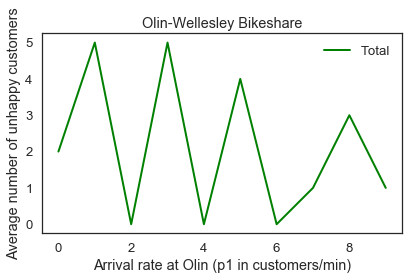

In [11]:
plot(results, label = 'Total', color ='green')
    
decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)',
         ylabel='Average number of unhappy customers')

#### Average number of unhappy customers

In [12]:
avg = results.mean()
avg = round(avg, 2)
print('The average number of unhappy customers is: ' + str(avg))

The average number of unhappy customers is: 2.1


#### run_multiple_simulations to run simulations with a range of values for p1

In [13]:
def sweep_p1(p1_array):
    
    np.random.seed(1412)
    
    sweep = SweepSeries()
    
    for p1 in p1_array:
        results = run_multiple_simulation(p1, p2, num_steps, num_runs)
        sweep[p1] = results.mean()
        

    plot(sweep, label = 'Total', color ='magenta')
    
    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)',
         ylabel='Average number of unhappy customers')

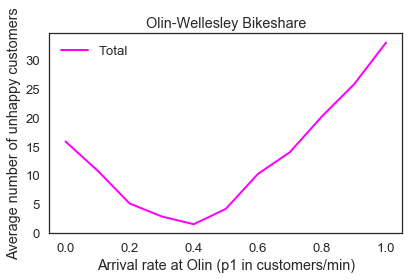

In [14]:
np.random.seed(1412)

p2 = 0.3
num_steps = 60
num_runs = 20
p1_array = linspace(0,1,11)

sweep_p1(p1_array)


In [15]:
print("The value of p1 that minimizes the average number of unhappy customers is: ", 0.4)

The value of p1 that minimizes the average number of unhappy customers is:  0.4


### 2. World population

#### Get world population data and make some changes

In [16]:
tables = pd.read_html('World_population_estimates.html', header=0, index_col=0, decimal="M")
len(tables)

6

In [17]:
# Get the 3rd element of the tables
table2 = tables[2]

In [18]:
# explore columns names
table2.columns

Index(['United States Census Bureau (2017)[28]',
       'Population Reference Bureau (1973–2016)[15]',
       'United Nations Department of Economic and Social Affairs (2015)[16]',
       'Maddison (2008)[17]', 'HYDE (2007)[24]', 'Tanton (1994)[18]',
       'Biraben (1980)[19]', 'McEvedy & Jones (1978)[20]',
       'Thomlinson (1975)[21]', 'Durand (1974)[22]', 'Clark (1967)[23]'],
      dtype='object')

In [19]:
# Replace new columns names
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [20]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Preliminary work

Before computing the different operations
We are going first to rewrite census and un series,
then write the population data in billion by dividing by $10^{9}$

In [21]:
census = table2.census
un = table2.un

census = census / 1e9
un = un / 1e9

In [22]:
# Display the head for census

census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

In [23]:
# Display the tail for un

un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

#### 1. Compute the elementwise differences, census - un

In [24]:
dif = census - un

# Print only the head and tails

with pd.option_context('display.max_rows',10):
    print(dif)

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012   -0.066201
2013   -0.069991
2014   -0.073816
2015   -0.101579
2016         NaN
Length: 67, dtype: float64


#### 2. Compute the absolute differences, abs(census - un)

In [25]:
abs_dif = abs(dif)

with pd.option_context('display.max_rows', 10):
    print(abs_dif)

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
          ...   
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
Length: 67, dtype: float64


#### 3. Compute the relative differences, abs(census - un) / un

In [26]:
rel_dif = abs_dif / un

with pd.option_context('display.max_rows', 10):
    print(rel_dif)

Year
1950    0.012862
1951    0.008585
1952    0.006674
1953    0.006072
1954    0.006286
          ...   
2012    0.009350
2013    0.009772
2014    0.010190
2015    0.013821
2016         NaN
Length: 67, dtype: float64


#### 4. Compute the percent differences, abs(census - un) / un * 100


In [27]:
perc_dif = rel_dif * 100

with pd.option_context('display.max_rows', 10):
    print(perc_dif)

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
          ...   
2012    0.935034
2013    0.977243
2014    1.019023
2015    1.382129
2016         NaN
Length: 67, dtype: float64


### Optional Exercise

#### Calculate elapsed time and total growth

In [28]:
# Initial year

t_i = 1970

# Calculate elapsed time based on ti

t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_i

# Calculate growth based on ti

p_i = census[t_i]  # population associated to t_i

p_0 = get_first_value(census)
p_end = get_last_value(census)

total_growth = p_end - p_i

#### Annual growth

In [29]:
annual_growth = total_growth / elapsed_time

#### Time series

In [30]:
# Initiate

results = TimeSeries()

results[t_0] = census[t_0] + (-0.384) # Add a constant. In this case, we substrat arbitrary by 15% of initial value.

In [31]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

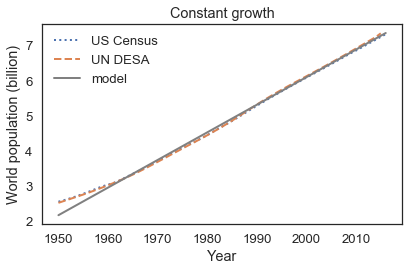

In [32]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
        
        

This constant growth model does a better job. Adding a constant to the starting value helps.

census from 1960 to 1970:

In [33]:
census.loc[1960:1970]

Year
1960    3.043002
1961    3.083967
1962    3.140093
1963    3.209828
1964    3.281201
1965    3.350426
1966    3.420678
1967    3.490334
1968    3.562314
1969    3.637159
1970    3.712698
Name: census, dtype: float64